# Part One
Entropy is a measure of impurity to measure how well a specific node in a decision tree is at correctly classifying things. Entropy is defined as the negative sum over all classes of the proportion of one class times the log of that proportion. This is to say that entropy measures how skewed or evenly distributed the data is in a given leaf. If the data is very evenly distributed it has a high entropy. If the data is almost all a single class the entropy is very low. Entropy is the most vanilla way of measuring impurity.
<br><br>
Gini is similar to Entropy just in the sense that it measures impurity. However it specifically looks at misclassifications. Gini is defined as one minus the sum over all classes of the proportion of that class squared. Because of the one minus, we are essentially looking at the ‘misclassifications’ rather than the ‘correct’ classifications. Misclassifications is perhaps not the correct phrase here given that we are measuring impurity rather than correctness, however because these are used in decision trees, those terms become synonymous. Similar to Entropy, Gini is highest with the most perfectly distributed data and lowest with the most homogenous data.
<br><br>
Classification error is defined as one minus the max proportion. This is similar to gini in that it is measuring the misclassification, hence the name classification error. However it disregards all information that is not the primary classifier, thus it is not as sensitive and not a good use for growing a decision tree.


Big thanks to the Racshka textbook for guiding this assignment

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
import tensorflow_datasets as tfds
(X_training, y_training), (X_testing, y_testing) = keras.datasets.mnist.load_data()

In [ ]:
X_training=X_training.astype("float32") / 255.0
X_testing =X_testing.astype("float32")/255.0
X_training = np.expand_dims(X_training, axis =-1)
X_testing = np.expand_dims(X_testing, axis =-1)

X_training, X_validation, y_training, y_validation = train_test_split(X_training, y_training, test_size = 0.1, random_state = 42)

In [ ]:
#There is no reason to view the data as it would appear in an actual image(aka a square)
#Instead we can view it a long list of 784 values ranging from 0-1 where 0 is white and 1 is black and .5 is some gray
#There are 60,000 data points of 28x28 
#Dividing by 255 makes the value a float between 0-1
print(X_training.shape)
print(X_testing.shape)
X_training = X_training.reshape(54000, 784)
X_testing = X_testing.reshape(10000, 784)
#print(X_training[30])

(54000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
#The basic tree model with a gini impurity function and a max depth of 4
#I could have used entropy but I found gini works slightly better
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
#building the bagging ensemble using a basic decision tree many times. 
bag = BaggingClassifier(base_estimator=tree_model,
#Build 200 different trees to take votes from
  n_estimators=200,
#Each tree is using 200 random samples with replacment 
  max_samples=200,
#each decision tree is based off all 784 features of the image
  max_features=784,
#We do use replacement
  bootstrap=True,
  bootstrap_features=False,
#Do not paralelize anything
  n_jobs=1,
#place a seed for the randomizer
  random_state=1,
  verbose =1)

#This is here just to compare to see how much better bagging is than a basic tree
one_tree = tree_model.fit(X_training, y_training)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#fit the model, under the hood this is where all 200 trees are made with there own unique feature splits
bag = bag.fit(X_training, y_training)
#This is where the voting takes place, the testing data is put through all 200 trees and the concesous becomes the prediction
y_test_pred = bag.predict(X_testing)
#this is puting the testing data through a single tree
y_test_predict_one_tree = one_tree.predict(X_testing)



/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s finished


In [ ]:
#get the accuracy, precision, and recall for the single tree model
one_tree_accuracy = accuracy_score(y_testing, y_test_predict_one_tree)
one_tree_precision = precision_score(y_testing, y_test_predict_one_tree, average = 'weighted')
one_tree_recall = recall_score(y_testing, y_test_predict_one_tree, average = 'weighted')
print('One Tree Accuracy: '+str(one_tree_accuracy))
print('One Tree Precision: '+str(one_tree_precision))
print('One Tree Recall: '+str(one_tree_recall))

One Tree Accuracy: 0.5959
One Tree Precision: 0.62646429113532
One Tree Recall: 0.5959


In [ ]:
#get the accuracy, precision, and recall for the bagging ensemble model
bag_accuracy = accuracy_score(y_testing, y_test_pred)
bag_precision = precision_score(y_testing, y_test_pred, average = 'weighted')
bag_recall = recall_score(y_testing, y_test_pred, average = 'weighted')
print('Bag Accuracy: '+str(bag_accuracy))
print('Bag Precision: '+str(bag_precision))
print('Bag Recall: '+str(bag_recall))

Bag Accuracy: 0.8247
Bag Precision: 0.8285979199281986
Bag Recall: 0.8247


In [ ]:
#Make predictions based on the single tree model
y_prediction = tree_model.predict(X_testing)


One tree confusion matrix
[[759   1  35   2   8   6  14  55   7  93]
 [  2 896  35  50   0   0  21  12 118   1]
 [ 13  53 570   9  30   0 124  94 104  35]
 [ 22   3  36 621   7  11  26  20 132 132]
 [  1   5  10  11 608  11  41  62  69 164]
 [ 41   6  37  94  53 182 195  23  89 172]
 [ 26   6  57   2 232  28 344  44  65 154]
 [  1  22  37   5  31   5  14 801  35  77]
 [  5  22  45  15  21  21 185   8 463 189]
 [  4   5   4  16  39  15  20  89 102 715]]


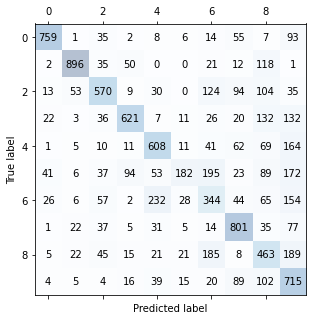

In [ ]:
from sklearn.metrics import confusion_matrix
#Print the confusion matrix for the single tree model, the diagnol is the true positives

confmat = confusion_matrix(y_testing, y_prediction)
print('One tree confusion matrix')
print(confmat)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
      ax.text(x=j, y=i,
      s=confmat[i, j],
      va='center', ha='center') 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
#Make predictions based on the bag model
y_prediction = bag.predict(X_testing)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s finished


Bag confusion matrix
[[ 958    2    1    2    0    1    4    2    9    1]
 [   0 1105   11    5    0    0    4    3    7    0]
 [  22   69  784   37   14    6   24   40   25   11]
 [  18   11   23  853    4   15    2   26   26   32]
 [   2   12    4    4  766    1   42   14   13  124]
 [  44   26    3  136   29  516   39   28   16   55]
 [  32   10   11    4   40   16  825    7   12    1]
 [   2   35   37    0   11    1    0  905   10   27]
 [   7   50    9   53   16   15   29    9  735   51]
 [  11   12   12   15   62    7    6   73   11  800]]


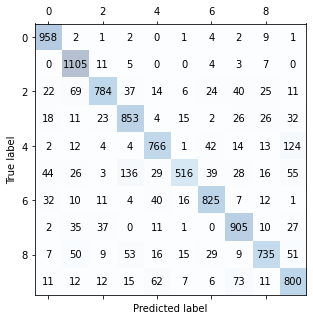

In [ ]:
from sklearn.metrics import confusion_matrix

#Print the confusion matrix for the bag model, the diagnol is the true positives
confmat = confusion_matrix(y_testing, y_prediction)
print('Bag confusion matrix')
print(confmat)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
      ax.text(x=j, y=i,
      s=confmat[i, j],
      va='center', ha='center') 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
bag_accuracy = accuracy_score(y_testing, y_prediction)
bag_precision = precision_score(y_testing, y_prediction, average = None)
bag_recall = recall_score(y_testing, y_prediction, average = None)
print('Bag Accuracy: '+str(bag_accuracy))
print('Bag Precision: '+str(bag_precision))
print('Bag Recall: '+str(bag_recall))

Bag Accuracy: 0.8247
Bag Precision: [0.87408759 0.82957958 0.87597765 0.76916141 0.81316348 0.89273356
 0.84615385 0.81752484 0.85069444 0.72595281]
Bag Recall: [0.97755102 0.97356828 0.75968992 0.84455446 0.78004073 0.57847534
 0.8611691  0.88035019 0.75462012 0.79286422]


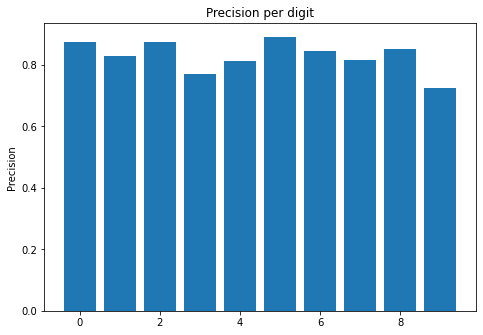

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Precision')
ax.set_title('Precision per digit')
classes = [0, 1, 2, 3, 4,5,6,7,8,9]
precision = bag_precision
ax.bar(classes,precision)
plt.show()

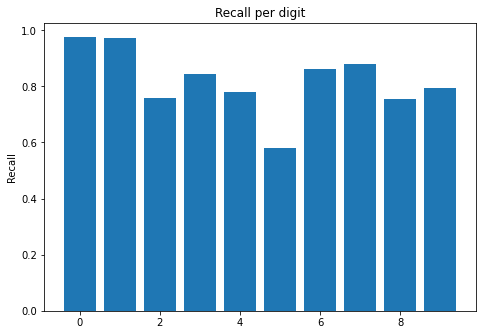

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Recall')
ax.set_title('Recall per digit')
classes = [0, 1, 2, 3, 4,5,6,7,8,9]
recall = bag_recall
ax.bar(classes,recall)
plt.show()

**Neural Net:** Precision: .970 Recall: .962 Accuracy: .977
<br> **CNN:** Precision: .991 Recall: .994 Accuracy: .995
<br> **Bagging Decision Tree:** Precision: .829 Recall: .823 Accuracy: .825
<br> <br>When it comes to Neural Nets the features are not neccesarily meaningful in a way that could be represented by a regression model(linear or logistic). Because we do not have those meaningful features, NN work as an almost black box that just tries many many different weights and biases until it builds a model that seems to work. This works reasonably well for images but once meaningful features gets introduced they can perform much better. Thats where CNNs come in. CNNs can take the image data and derive meaningful features from them using filters(is there a curve, is there a face...). Now that there are meaningful features, a Neural network can produce much better results. This is reflected in the fact that the CNN metrics are all much higher than the NN metrics. The worst thing one could do is take meaningless features and pretend that they are in fact meaningful. That is what happens with the decision tree. The decision tree is making decisions of classification based on the raw features alone without adding black box weights and biases. Because pixel data is not, in actuality, meaningless feautres the model does work. However it will always underperform a neural network model. Even when using a bagging technique which improves all metrics.
